# Rock Paper Scissors - Agents Comparison 

This notebook contains a lot of different agents from different sources.    
In the **Comparison In Battle** section, we also added a comparison in a fair battle of each agent with each in 1 round with 1000 steps.

![](https://storage.googleapis.com/kaggle-competitions/kaggle/22838/logos/header.png?t=2020-11-02-21-55-44)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:black; background:#FBE338; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

* [Agent: Hit The Last Own Action](#1)
* [Agent: Rock](#2)
* [Agent: Paper](#3)
* [Agent: Scissors](#4)
* [Agent: Copy Opponent](#5)
* [Agent: Reactionary](#6)
* [Agent: Counter Reactionary](#7)
* [Agent: Statistical](#8)
* [Agent: Nash Equilibrium](#9)
* [Agent: Markov Agent](#10)
* [Agent: Memory Patterns](#11)
* [Agent: Multi Armed Bandit](#12)
* [Agent: Opponent Transition Matrix](#13)
* [Agent: Decision Tree Classifier](#14)
* [Agent: Statistical Prediction](#15)

    
* [Example Using The kaggle_environments For Testing Agents](#100)
* [Comparison In Battle](#101)
* [Test Your Own Agent](#102)

<a id="1"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Hit The Last Own Action<center><h2>

The idea of the agent:

- A lot of agents use a simple baseline - copy the last action of the opponent.   
- That's why we can simply hit our last actions (new action of the opponent)

In [1]:
%%writefile hit_the_last_own_action.py

my_last_action = 0

def hit_the_last_own_action(observation, configuration):
    global my_last_action
    my_last_action = (my_last_action + 1) % 3
    
    return my_last_action

Writing hit_the_last_own_action.py


<a id="2"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Rock<center><h2>

Copy from: https://github.com/Kaggle/kaggle-environments/blob/master/kaggle_environments/envs/rps/agents.py    

Always uses Rock action

In [2]:
%%writefile rock.py

def rock(observation, configuration):
    return 0

Writing rock.py


<a id="3"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Paper<center><h2>

Copy from: https://github.com/Kaggle/kaggle-environments/blob/master/kaggle_environments/envs/rps/agents.py

Always uses Paper action

In [3]:
%%writefile paper.py

def paper(observation, configuration):
    return 1


Writing paper.py


<a id="4"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Scissors<center><h2>

Copy from: https://github.com/Kaggle/kaggle-environments/blob/master/kaggle_environments/envs/rps/agents.py

Always uses Scissors action

In [4]:
%%writefile scissors.py

def scissors(observation, configuration):
    return 2

Writing scissors.py


<a id="5"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Copy Opponent<center><h2>

Copy from: https://github.com/Kaggle/kaggle-environments/blob/master/kaggle_environments/envs/rps/agents.py

Copy the last action of the opponent

In [5]:
%%writefile copy_opponent.py

import random
from kaggle_environments.envs.rps.utils import get_score

def copy_opponent(observation, configuration):
    if observation.step > 0:
        return observation.lastOpponentAction
    else:
        return random.randrange(0, configuration.signs)

Writing copy_opponent.py


<a id="6"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Reactionary<center><h2>


Copy from: https://github.com/Kaggle/kaggle-environments/blob/master/kaggle_environments/envs/rps/agents.py

Hit the last action of the opponent

In [6]:
%%writefile reactionary.py

import random
from kaggle_environments.envs.rps.utils import get_score

last_react_action = None


def reactionary(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) <= 1:
        last_react_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_react_action

Writing reactionary.py


<a id="7"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Counter Reactionary<center><h2>



Copy from: https://github.com/Kaggle/kaggle-environments/blob/master/kaggle_environments/envs/rps/agents.py

In [7]:
%%writefile counter_reactionary.py

import random
from kaggle_environments.envs.rps.utils import get_score

last_counter_action = None


def counter_reactionary(observation, configuration):
    global last_counter_action
    if observation.step == 0:
        last_counter_action = random.randrange(0, configuration.signs)
    elif get_score(last_counter_action, observation.lastOpponentAction) == 1:
        last_counter_action = (last_counter_action + 2) % configuration.signs
    else:
        last_counter_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_counter_action

Writing counter_reactionary.py


<a id="8"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Statistical<center><h2>




Copy from: https://github.com/Kaggle/kaggle-environments/blob/master/kaggle_environments/envs/rps/agents.py

In [8]:
%%writefile statistical.py

import random
from kaggle_environments.envs.rps.utils import get_score

action_histogram = {}

def statistical(observation, configuration):
    global action_histogram
    if observation.step == 0:
        action_histogram = {}
        return
    action = observation.lastOpponentAction
    if action not in action_histogram:
        action_histogram[action] = 0
    action_histogram[action] += 1
    mode_action = None
    mode_action_count = None
    for k, v in action_histogram.items():
        if mode_action_count is None or v > mode_action_count:
            mode_action = k
            mode_action_count = v
            continue

    return (mode_action + 1) % configuration.signs

Writing statistical.py


<a id="9"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Nash Equilibrium<center><h2>




Copy from kernel [Rock Paper Scissors - Nash Equilibrium Strategy](https://www.kaggle.com/ihelon/rock-paper-scissors-nash-equilibrium-strategy)

Nash Equilibrium Strategy (always random)

In [9]:
%%writefile nash_equilibrium.py

import random

def nash_equilibrium(observation, configuration):
    return random.randint(0, 2)

Writing nash_equilibrium.py


<a id="10"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Markov Agent<center><h2>




Copy from kernel [(Not so) Markov ⛓️](https://www.kaggle.com/alexandersamarin/not-so-markov)

In [10]:
%%writefile markov_agent.py

import numpy as np
import collections

def markov_agent(observation, configuration):
    k = 2
    global table, action_seq
    if observation.step % 250 == 0: # refresh table every 250 steps
        action_seq, table = [], collections.defaultdict(lambda: [1, 1, 1])    
    if len(action_seq) <= 2 * k + 1:
        action = int(np.random.randint(3))
        if observation.step > 0:
            action_seq.extend([observation.lastOpponentAction, action])
        else:
            action_seq.append(action)
        return action
    # update table
    key = ''.join([str(a) for a in action_seq[:-1]])
    table[key][observation.lastOpponentAction] += 1
    # update action seq
    action_seq[:-2] = action_seq[2:]
    action_seq[-2] = observation.lastOpponentAction
    # predict opponent next move
    key = ''.join([str(a) for a in action_seq[:-1]])
    if observation.step < 500:
        next_opponent_action_pred = np.argmax(table[key])
    else:
        scores = np.array(table[key])
        next_opponent_action_pred = np.random.choice(3, p=scores/scores.sum()) # add stochasticity for second part of the game
    # make an action
    action = (next_opponent_action_pred + 1) % 3
    # if high probability to lose -> let's surprise our opponent with sudden change of our strategy
    if observation.step > 900:
        action = next_opponent_action_pred
    action_seq[-1] = action
    return int(action)

Writing markov_agent.py


<a id="11"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Memory Patterns<center><h2>




Copy from kernel [Rock, Paper, Scissors with Memory Patterns](https://www.kaggle.com/yegorbiryukov/rock-paper-scissors-with-memory-patterns)

In [11]:
%%writefile memory_patterns.py

import random

def find_pattern(memory_patterns, memory, memory_length):
    """ find appropriate pattern in memory """
    for pattern in memory_patterns:
        actions_matched = 0
        for i in range(memory_length):
            if pattern["actions"][i] == memory[i]:
                actions_matched += 1
            else:
                break
        # if memory fits this pattern
        if actions_matched == memory_length:
            return pattern
    # appropriate pattern not found
    return None

def get_step_result_for_my_agent(my_agent_action, opp_action):
    """ 
        get result of the step for my_agent
        1, 0 and -1 representing win, tie and lost results of the game respectively
    """
    if my_agent_action == opp_action:
        return 0
    elif (my_agent_action == (opp_action + 1)) or (my_agent_action == 0 and opp_action == 2):
        return 1
    else:
        return -1


# maximum steps in the pattern
steps_max = 3
# minimum steps in the pattern
steps_min = 3
# maximum amount of steps until reassessment of effectiveness of current memory patterns
max_steps_until_memory_reassessment = random.randint(80, 120)

# current memory of the agent
current_memory = []
# list of 1, 0 and -1 representing win, tie and lost results of the game respectively
# length is max_steps_until_memory_reassessment
results = []
# current best sum of results
best_sum_of_results = 0
# how many times each action was performed by opponent
opponent_actions_count = [0, 0, 0]
# memory length of patterns in first group
# steps_max is multiplied by 2 to consider both my_agent's and opponent's actions
group_memory_length = steps_max * 2
# list of groups of memory patterns
groups_of_memory_patterns = []
for i in range(steps_max, steps_min - 1, -1):
    groups_of_memory_patterns.append({
        # how many steps in a row are in the pattern
        "memory_length": group_memory_length,
        # list of memory patterns
        "memory_patterns": []
    })
    group_memory_length -= 2
    

def my_agent(obs, conf):
    """ your ad here """
    global results
    global best_sum_of_results
    # action of my_agent
    my_action = None
    
    # if it's not first step, add opponent's last action to agent's current memory
    # and reassess effectiveness of current memory patterns
    if obs["step"] > 0:
        # count opponent's actions
        opponent_actions_count[obs["lastOpponentAction"]] += 1
        # add opponent's last step to current_memory
        current_memory.append(obs["lastOpponentAction"])
        # previous step won or lost
        results.append(get_step_result_for_my_agent(current_memory[-2], current_memory[-1]))
        
        # if there is enough steps added to results for memery reassessment
        if len(results) == max_steps_until_memory_reassessment:
            results_sum = sum(results)
            # if effectiveness of current memory patterns has decreased significantly
            if results_sum < (best_sum_of_results * 0.5):
                # flush all current memory patterns
                best_sum_of_results = 0
                results = []
                for group in groups_of_memory_patterns:
                    group["memory_patterns"] = []
            else:
                # if effectiveness of current memory patterns has increased
                if results_sum > best_sum_of_results:
                    best_sum_of_results = results_sum
                del results[:1]
    
    # search for my_action in memory patterns
    for group in groups_of_memory_patterns:
        # if length of current memory is bigger than necessary for a new memory pattern
        if len(current_memory) > group["memory_length"]:
            # get momory of the previous step
            previous_step_memory = current_memory[:group["memory_length"]]
            previous_pattern = find_pattern(group["memory_patterns"], previous_step_memory, group["memory_length"])
            if previous_pattern == None:
                previous_pattern = {
                    "actions": previous_step_memory.copy(),
                    "opp_next_actions": [
                        {"action": 0, "amount": 0, "response": 1},
                        {"action": 1, "amount": 0, "response": 2},
                        {"action": 2, "amount": 0, "response": 0}
                    ]
                }
                group["memory_patterns"].append(previous_pattern)
            # if such pattern already exists
            for action in previous_pattern["opp_next_actions"]:
                if action["action"] == obs["lastOpponentAction"]:
                    action["amount"] += 1
            # delete first two elements in current memory (actions of the oldest step in current memory)
            del current_memory[:2]
            
            # if action was not yet found
            if my_action == None:
                pattern = find_pattern(group["memory_patterns"], current_memory, group["memory_length"])
                # if appropriate pattern is found
                if pattern != None:
                    my_action_amount = 0
                    for action in pattern["opp_next_actions"]:
                        # if this opponent's action occurred more times than currently chosen action
                        # or, if it occured the same amount of times and this one is choosen randomly among them
                        if (action["amount"] > my_action_amount or
                                (action["amount"] == my_action_amount and random.random() > 0.5)):
                            my_action_amount = action["amount"]
                            my_action = action["response"]
    
    # if no action was found
    if my_action == None:
        # choose action randomly
        my_action = random.randint(0, 2)
    
    current_memory.append(my_action)
    return my_action

Writing memory_patterns.py


<a id="12"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Multi Armed Bandit<center><h2>

Copy from kernel [Multi-armed bandit vs deterministic agents](https://www.kaggle.com/ilialar/multi-armed-bandit-vs-deterministic-agents)

In [12]:
%%writefile multi_armed_bandit.py


import pandas as pd
import numpy as np
import json


# base class for all agents, random agent
class agent():
    def initial_step(self):
        return np.random.randint(3)
    
    def history_step(self, history):
        return np.random.randint(3)
    
    def step(self, history):
        if len(history) == 0:
            return int(self.initial_step())
        else:
            return int(self.history_step(history))
    
# agent that returns (previousCompetitorStep + shift) % 3
class mirror_shift(agent):
    def __init__(self, shift=0):
        self.shift = shift
    
    def history_step(self, history):
        return (history[-1]['competitorStep'] + self.shift) % 3
    
    
# agent that returns (previousPlayerStep + shift) % 3
class self_shift(agent):
    def __init__(self, shift=0):
        self.shift = shift
    
    def history_step(self, history):
        return (history[-1]['step'] + self.shift) % 3    


# agent that beats the most popular step of competitor
class popular_beater(agent):
    def history_step(self, history):
        counts = np.bincount([x['competitorStep'] for x in history])
        return (int(np.argmax(counts)) + 1) % 3

    
# agent that beats the agent that beats the most popular step of competitor
class anti_popular_beater(agent):
    def history_step(self, history):
        counts = np.bincount([x['step'] for x in history])
        return (int(np.argmax(counts)) + 2) % 3
    
    
# simple transition matrix: previous step -> next step
class transition_matrix(agent):
    def __init__(self, deterministic = False, counter_strategy = False, init_value = 0.1, decay = 1):
        self.deterministic = deterministic
        self.counter_strategy = counter_strategy
        if counter_strategy:
            self.step_type = 'step' 
        else:
            self.step_type = 'competitorStep'
        self.init_value = init_value
        self.decay = decay
        
    def history_step(self, history):
        matrix = np.zeros((3,3)) + self.init_value
        for i in range(len(history) - 1):
            matrix = (matrix - self.init_value) / self.decay + self.init_value
            matrix[int(history[i][self.step_type]), int(history[i+1][self.step_type])] += 1

        if  self.deterministic:
            step = np.argmax(matrix[int(history[-1][self.step_type])])
        else:
            step = np.random.choice([0,1,2], p = matrix[int(history[-1][self.step_type])]/matrix[int(history[-1][self.step_type])].sum())
        
        if self.counter_strategy:
            # we predict our step using transition matrix (as competitor can do) and beat probable competitor step
            return (step + 2) % 3 
        else:
            # we just predict competitors step and beat it
            return (step + 1) % 3
    

# similar to the transition matrix but rely on both previous steps
class transition_tensor(agent):
    
    def __init__(self, deterministic = False, counter_strategy = False, init_value = 0.1, decay = 1):
        self.deterministic = deterministic
        self.counter_strategy = counter_strategy
        if counter_strategy:
            self.step_type1 = 'step' 
            self.step_type2 = 'competitorStep'
        else:
            self.step_type2 = 'step' 
            self.step_type1 = 'competitorStep'
        self.init_value = init_value
        self.decay = decay
        
    def history_step(self, history):
        matrix = np.zeros((3,3, 3)) + 0.1
        for i in range(len(history) - 1):
            matrix = (matrix - self.init_value) / self.decay + self.init_value
            matrix[int(history[i][self.step_type1]), int(history[i][self.step_type2]), int(history[i+1][self.step_type1])] += 1

        if  self.deterministic:
            step = np.argmax(matrix[int(history[-1][self.step_type1]), int(history[-1][self.step_type2])])
        else:
            step = np.random.choice([0,1,2], p = matrix[int(history[-1][self.step_type1]), int(history[-1][self.step_type2])]/matrix[int(history[-1][self.step_type1]), int(history[-1][self.step_type2])].sum())
        
        if self.counter_strategy:
            # we predict our step using transition matrix (as competitor can do) and beat probable competitor step
            return (step + 2) % 3 
        else:
            # we just predict competitors step and beat it
            return (step + 1) % 3

        
# looks for the same pattern in history and returns the best answer to the most possible counter strategy
class pattern_matching(agent):
    def __init__(self, steps = 3, deterministic = False, counter_strategy = False, init_value = 0.1, decay = 1):
        self.deterministic = deterministic
        self.counter_strategy = counter_strategy
        if counter_strategy:
            self.step_type = 'step' 
        else:
            self.step_type = 'competitorStep'
        self.init_value = init_value
        self.decay = decay
        self.steps = steps
        
    def history_step(self, history):
        if len(history) < self.steps + 1:
            return self.initial_step()
        
        next_step_count = np.zeros(3) + self.init_value
        pattern = [history[i][self.step_type] for i in range(- self.steps, 0)]
        
        for i in range(len(history) - self.steps):
            next_step_count = (next_step_count - self.init_value)/self.decay + self.init_value
            current_pattern = [history[j][self.step_type] for j in range(i, i + self.steps)]
            if np.sum([pattern[j] == current_pattern[j] for j in range(self.steps)]) == self.steps:
                next_step_count[history[i + self.steps][self.step_type]] += 1
        
        if next_step_count.max() == self.init_value:
            return self.initial_step()
        
        if  self.deterministic:
            step = np.argmax(next_step_count)
        else:
            step = np.random.choice([0,1,2], p = next_step_count/next_step_count.sum())
        
        if self.counter_strategy:
            # we predict our step using transition matrix (as competitor can do) and beat probable competitor step
            return (step + 2) % 3 
        else:
            # we just predict competitors step and beat it
            return (step + 1) % 3
        
# if we add all agents the algorithm will spend more that 1 second on turn and will be invalidated
# right now the agens are non optimal and the same computeations are repeated a lot of times
# the approach can be optimised to run much faster
agents = {
    'mirror_0': mirror_shift(0),
    'mirror_1': mirror_shift(1),  
    'mirror_2': mirror_shift(2),
    'self_0': self_shift(0),
    'self_1': self_shift(1),  
    'self_2': self_shift(2),
    'popular_beater': popular_beater(),
    'anti_popular_beater': anti_popular_beater(),
    'random_transitison_matrix': transition_matrix(False, False),
    'determenistic_transitison_matrix': transition_matrix(True, False),
    'random_self_trans_matrix': transition_matrix(False, True),
    'determenistic_self_trans_matrix': transition_matrix(True, True),
    'random_transitison_tensor': transition_tensor(False, False),
    'determenistic_transitison_tensor': transition_tensor(True, False),
    'random_self_trans_tensor': transition_tensor(False, True),
    'determenistic_self_trans_tensor': transition_tensor(True, True),
    
    'random_transitison_matrix_decay': transition_matrix(False, False, decay = 1.05),
    'random_self_trans_matrix_decay': transition_matrix(False, True, decay = 1.05),
    'random_transitison_tensor_decay': transition_tensor(False, False, decay = 1.05),
    'random_self_trans_tensor_decay': transition_tensor(False, True, decay = 1.05),
    
    'determenistic_transitison_matrix_decay': transition_matrix(True, False, decay = 1.05),
    'determenistic_self_trans_matrix_decay': transition_matrix(True, True, decay = 1.05),
    'determenistic_transitison_tensor_decay': transition_tensor(True, False, decay = 1.05),
    'determenistic_self_trans_tensor_decay': transition_tensor(True, True, decay = 1.05),
    
#     'random_transitison_matrix_decay2': transition_matrix(False, False, decay = 1.001),
#     'random_self_trans_matrix_decay2': transition_matrix(False, True, decay = 1.001),
#     'random_transitison_tensor_decay2': transition_tensor(False, False, decay = 1.001),
#     'random_self_trans_tensor_decay2': transition_tensor(False, True, decay = 1.001),
    
#     'determenistic_transitison_matrix_decay2': transition_matrix(True, False, decay = 1.001),
#     'determenistic_self_trans_matrix_decay2': transition_matrix(True, True, decay = 1.001),
#     'determenistic_transitison_tensor_decay2': transition_tensor(True, False, decay = 1.001),
#     'determenistic_self_trans_tensor_decay2': transition_tensor(True, True, decay = 1.001),
    
#     'random_pattern_matching_decay_1': pattern_matching(1, False, False, decay = 1.001),
#     'random_self_pattern_matching_decay_1': pattern_matching(1, False, True, decay = 1.001),
#     'determenistic_pattern_matching_decay_1': pattern_matching(1, True, False, decay = 1.001),
#     'determenistic_self_pattern_matching_decay_1': pattern_matching(1, True, True, decay = 1.001),
    
#     'random_pattern_matching_decay_2': pattern_matching(2, False, False, decay = 1.001),
#     'random_self_pattern_matching_decay_2': pattern_matching(2, False, True, decay = 1.001),
#     'determenistic_pattern_matching_decay_2': pattern_matching(2, True, False, decay = 1.001),
#     'determenistic_self_pattern_matching_decay_2': pattern_matching(2, True, True, decay = 1.001),
    
#     'random_pattern_matching_decay_3': pattern_matching(3, False, False, decay = 1.001),
#     'random_self_pattern_matching_decay_3': pattern_matching(3, False, True, decay = 1.001),
    'determenistic_pattern_matching_decay_3': pattern_matching(3, True, False, decay = 1.001),
    'determenistic_self_pattern_matching_decay_3': pattern_matching(3, True, True, decay = 1.001),
    
#     'random_pattern_matching_decay_4': pattern_matching(4, False, False, decay = 1.001),
#     'random_self_pattern_matching_decay_4': pattern_matching(4, False, True, decay = 1.001),
#     'determenistic_pattern_matching_decay_4': pattern_matching(4, True, False, decay = 1.001),
#     'determenistic_self_pattern_matching_decay_4': pattern_matching(4, True, True, decay = 1.001),
    
#     'random_pattern_matching_decay_5': pattern_matching(5, False, False, decay = 1.001),
#     'random_self_pattern_matching_decay_5': pattern_matching(5, False, True, decay = 1.001),
#     'determenistic_pattern_matching_decay_5': pattern_matching(5, True, False, decay = 1.001),
#     'determenistic_self_pattern_matching_decay_5': pattern_matching(5, True, True, decay = 1.001),
    
#     'random_pattern_matching_decay_6': pattern_matching(6, False, False, decay = 1.001),
#     'random_self_pattern_matching_decay_6': pattern_matching(6, False, True, decay = 1.001),
#     'determenistic_pattern_matching_decay_6': pattern_matching(6, True, False, decay = 1.001),
#     'determenistic_self_pattern_matching_decay_6': pattern_matching(6, True, True, decay = 1.001),
}

history = []
bandit_state = {k:[1,1] for k in agents.keys()}
    
def multi_armed_bandit_agent (observation, configuration):
    
    # bandits' params
    step_size = 3 # how much we increase a and b 
    decay_rate = 1.05 # how much do we decay old historical data
    
    global history, bandit_state
    
    def log_step(step = None, history = None, agent = None, competitorStep = None, file = 'history.csv'):
        if step is None:
            step = np.random.randint(3)
        if history is None:
            history = []
        history.append({'step': step, 'competitorStep': competitorStep, 'agent': agent})
        if file is not None:
            pd.DataFrame(history).to_csv(file, index = False)
        return step
    
    def update_competitor_step(history, competitorStep):
        history[-1]['competitorStep'] = int(competitorStep)
        return history
    
    # load history
    if observation.step == 0:
        pass
    else:
        history = update_competitor_step(history, observation.lastOpponentAction)
        
        # updating bandit_state using the result of the previous step
        # we can update all states even those that were not used
        for name, agent in agents.items():
            agent_step = agent.step(history[:-1])
            bandit_state[name][1] = (bandit_state[name][1] - 1) / decay_rate + 1
            bandit_state[name][0] = (bandit_state[name][0] - 1) / decay_rate + 1
            
            if (history[-1]['competitorStep'] - agent_step) % 3 == 1:
                bandit_state[name][1] += step_size
            elif (history[-1]['competitorStep'] - agent_step) % 3 == 2:
                bandit_state[name][0] += step_size
            else:
                bandit_state[name][0] += step_size/2
                bandit_state[name][1] += step_size/2
            
    # we can use it for analysis later
    with open('bandit.json', 'w') as outfile:
        json.dump(bandit_state, outfile)
    
    
    # generate random number from Beta distribution for each agent and select the most lucky one
    best_proba = -1
    best_agent = None
    for k in bandit_state.keys():
        proba = np.random.beta(bandit_state[k][0],bandit_state[k][1])
        if proba > best_proba:
            best_proba = proba
            best_agent = k
        
    step = agents[best_agent].step(history)
    
    return log_step(step, history, best_agent)

Writing multi_armed_bandit.py


<a id="13"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Opponent Transition Matrix<center><h2>


Copy from kernel [RPS: Opponent Transition Matrix](https://www.kaggle.com/group16/rps-opponent-transition-matrix)

In [13]:
%%writefile opponent_transition_matrix.py

import numpy as np
import pandas as pd
import random

T = np.zeros((3, 3))
P = np.zeros((3, 3))

# a1 is the action of the opponent 1 step ago
# a2 is the action of the opponent 2 steps ago
a1, a2 = None, None

def transition_agent(observation, configuration):
    global T, P, a1, a2
    if observation.step > 1:
        a1 = observation.lastOpponentAction
        T[a2, a1] += 1
        P = np.divide(T, np.maximum(1, T.sum(axis=1)).reshape(-1, 1))
        a2 = a1
        if np.sum(P[a1, :]) == 1:
            return int((np.random.choice(
                [0, 1, 2],
                p=P[a1, :]
            ) + 1) % 3)
        else:
            return int(np.random.randint(3))
    else:
        if observation.step == 1:
            a2 = observation.lastOpponentAction
        return int(np.random.randint(3))

Writing opponent_transition_matrix.py


<a id="14"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Decision Tree Classifier<center><h2>



Copy from kernel [Decision Tree Classifier](https://www.kaggle.com/alexandersamarin/decision-tree-classifier?scriptVersionId=46415861)

In [14]:
%%writefile decision_tree_classifier.py

import numpy as np
import collections
from sklearn.tree import DecisionTreeClassifier

def construct_local_features(rollouts):
    features = np.array([[step % k for step in rollouts['steps']] for k in (2, 3, 5)])
    features = np.append(features, rollouts['steps'])
    features = np.append(features, rollouts['actions'])
    features = np.append(features, rollouts['opp-actions'])
    return features

def construct_global_features(rollouts):
    features = []
    for key in ['actions', 'opp-actions']:
        for i in range(3):
            actions_count = np.mean([r == i for r in rollouts[key]])
            features.append(actions_count)
    
    return np.array(features)

def construct_features(short_stat_rollouts, long_stat_rollouts):
    lf = construct_local_features(short_stat_rollouts)
    gf = construct_global_features(long_stat_rollouts)
    features = np.concatenate([lf, gf])
    return features

def predict_opponent_move(train_data, test_sample):
    classifier = DecisionTreeClassifier(random_state=42)
    classifier.fit(train_data['x'], train_data['y'])
    return classifier.predict(test_sample)

def update_rollouts_hist(rollouts_hist, last_move, opp_last_action):
    rollouts_hist['steps'].append(last_move['step'])
    rollouts_hist['actions'].append(last_move['action'])
    rollouts_hist['opp-actions'].append(opp_last_action)
    return rollouts_hist

def warmup_strategy(observation, configuration):
    global rollouts_hist, last_move
    action = int(np.random.randint(3))
    if observation.step == 0:
        last_move = {'step': 0, 'action': action}
        rollouts_hist = {'steps': [], 'actions': [], 'opp-actions': []}
    else:
        rollouts_hist = update_rollouts_hist(rollouts_hist, last_move, observation.lastOpponentAction)
        last_move = {'step': observation.step, 'action': action}
    return int(action)

def init_training_data(rollouts_hist, k):
    for i in range(len(rollouts_hist['steps']) - k + 1):
        short_stat_rollouts = {key: rollouts_hist[key][i:i+k] for key in rollouts_hist}
        long_stat_rollouts = {key: rollouts_hist[key][:i+k] for key in rollouts_hist}
        features = construct_features(short_stat_rollouts, long_stat_rollouts)        
        data['x'].append(features)
    test_sample = data['x'][-1].reshape(1, -1)
    data['x'] = data['x'][:-1]
    data['y'] = rollouts_hist['opp-actions'][k:]
    return data, test_sample

def agent(observation, configuration):
    # hyperparameters
    k = 5
    min_samples = 25
    global rollouts_hist, last_move, data, test_sample
    if observation.step == 0:
        data = {'x': [], 'y': []}
    # if not enough data -> randomize
    if observation.step <= min_samples + k:
        return warmup_strategy(observation, configuration)
    # update statistics
    rollouts_hist = update_rollouts_hist(rollouts_hist, last_move, observation.lastOpponentAction)
    # update training data
    if len(data['x']) == 0:
        data, test_sample = init_training_data(rollouts_hist, k)
    else:        
        short_stat_rollouts = {key: rollouts_hist[key][-k:] for key in rollouts_hist}
        features = construct_features(short_stat_rollouts, rollouts_hist)
        data['x'].append(test_sample[0])
        data['y'] = rollouts_hist['opp-actions'][k:]
        test_sample = features.reshape(1, -1)
        
    # predict opponents move and choose an action
    next_opp_action_pred = predict_opponent_move(data, test_sample)
    action = int((next_opp_action_pred + 1) % 3)
    last_move = {'step': observation.step, 'action': action}
    return action

Writing decision_tree_classifier.py


<a id="15"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Agent: Statistical Prediction<center><h2>



Copy from kernel [Rock Paper Scissors - Statistical Prediction](https://www.kaggle.com/jamesmcguigan/rock-paper-scissors-statistical-prediction)

In [15]:
%%writefile statistical_prediction.py

import random
import pydash
from collections import Counter

# Create a small amount of starting history
history = {
    "guess":      [0,1,2],
    "prediction": [0,1,2],
    "expected":   [0,1,2],
    "action":     [0,1,2],
    "opponent":   [0,1],
}
def statistical_prediction_agent(observation, configuration):    
    global history
    actions         = list(range(configuration.signs))  # [0,1,2]
    last_action     = history['action'][-1]
    opponent_action = observation.lastOpponentAction if observation.step > 0 else 2
    
    history['opponent'].append(opponent_action)

    # Make weighted random guess based on the complete move history, weighted towards relative moves based on our last action 
    move_frequency       = Counter(history['opponent'])
    response_frequency   = Counter(zip(history['action'], history['opponent'])) 
    move_weights         = [ move_frequency.get(n,1) + response_frequency.get((last_action,n),1) for n in range(configuration.signs) ] 
    guess                = random.choices( population=actions, weights=move_weights, k=1 )[0]
    
    # Compare our guess to how our opponent actually played
    guess_frequency      = Counter(zip(history['guess'], history['opponent']))
    guess_weights        = [ guess_frequency.get((guess,n),1) for n in range(configuration.signs) ]
    prediction           = random.choices( population=actions, weights=guess_weights, k=1 )[0]

    # Repeat, but based on how many times our prediction was correct
    prediction_frequency = Counter(zip(history['prediction'], history['opponent']))
    prediction_weights   = [ prediction_frequency.get((prediction,n),1) for n in range(configuration.signs) ]
    expected             = random.choices( population=actions, weights=prediction_weights, k=1 )[0]

    # Play the +1 counter move
    action = (expected + 1) % configuration.signs
    
    # Persist state
    history['guess'].append(guess)
    history['prediction'].append(prediction)
    history['expected'].append(expected)
    history['action'].append(action)

    # Print debug information
    print('opponent_action                = ', opponent_action)
    print('move_weights,       guess      = ', move_weights, guess)
    print('guess_weights,      prediction = ', guess_weights, prediction)
    print('prediction_weights, expected   = ', prediction_weights, expected)
    print('action                         = ', action)
    print()
    
    return action

Writing statistical_prediction.py


<a id="100"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Example Using The kaggle_environments For Testing Agents<center><h2>

We need to import the library for creating environments and simulating agent battles

In [16]:
# Upgrade kaggle_environments using pip before import
!pip install -q -U kaggle_environments

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

Loading environment football failed: No module named 'gfootball'


Create a rock-paper-scissors environment (RPS), and set 1000 episodes for each simulation

In [18]:
env = make(
    "rps", 
    configuration={
        "episodeSteps": 1000
    }
)

Let's start simulating the battle invert_my_last_action vs copy_opponent_agent

In [19]:
# Battle example: invert_my_last_action vs copy_opponent_agent
env.run(
    ["statistical_prediction.py", "hit_the_last_own_action.py"]
)

env.render(mode="ipython", width=500, height=400)

In [20]:
# Battle example: decision_tree_classifier vs decision_tree_classifier
env.run(
    ["decision_tree_classifier.py", "decision_tree_classifier.py"]
)

env.render(mode="ipython", width=500, height=400)

Get score for 2 agents in the battle

In [21]:
evaluate(
    "rps", 
    ["rock.py", "scissors.py"], 
    configuration={"episodeSteps": 1000}
)

[[999.0, -999.0]]

In [22]:
evaluate(
    "rps", 
    ["scissors.py", "decision_tree_classifier.py"], 
    configuration={"episodeSteps": 1000}
)

[[-962.0, 962.0]]

<a id="101"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Comparison In Battle<center><h2>


In [23]:
list_names = [
    "rock", 
    "paper", 
    "scissors",
    "hit_the_last_own_action",  
    "copy_opponent", 
    "reactionary", 
    "counter_reactionary", 
    "statistical", 
    "nash_equilibrium",
    "markov_agent", 
    "memory_patterns", 
    "multi_armed_bandit",
    "opponent_transition_matrix",
    "decision_tree_classifier",
    "statistical_prediction",
]
list_agents = [agent_name + ".py" for agent_name in list_names]

n_agents = len(list_names)

scores = np.zeros((n_agents, n_agents), dtype=np.int)

In [24]:
print("Simulation of battles. It can take some time...")

for ind_agent_1 in range(len(list_names)):
    for ind_agent_2 in range(ind_agent_1 + 1, len(list_names)):
        print(
            f"LOG: {list_names[ind_agent_1]} vs {list_names[ind_agent_2]}", 
            end="\r"
        )
        
        current_score = evaluate(
            "rps", 
            [list_agents[ind_agent_1], list_agents[ind_agent_2]], 
            configuration={"episodeSteps": 1000}
        )
        
        scores[ind_agent_1, ind_agent_2] = current_score[0][0]
        scores[ind_agent_2, ind_agent_1] = current_score[0][1]
    
    print()

Simulation of battles. It can take some time...
LOG: rock vs statistical_prediction
LOG: paper vs statistical_prediction
LOG: scissors vs statistical_prediction
LOG: hit_the_last_own_action vs statistical_prediction
LOG: copy_opponent vs statistical_prediction
LOG: reactionary vs statistical_prediction
LOG: counter_reactionary vs statistical_prediction
LOG: statistical vs statistical_prediction
LOG: nash_equilibrium vs statistical_prediction
LOG: markov_agent vs statistical_prediction
LOG: memory_patterns vs statistical_prediction
LOG: multi_armed_bandit vs statistical_prediction
LOG: opponent_transition_matrix vs statistical_prediction
LOG: decision_tree_classifier vs statistical_prediction



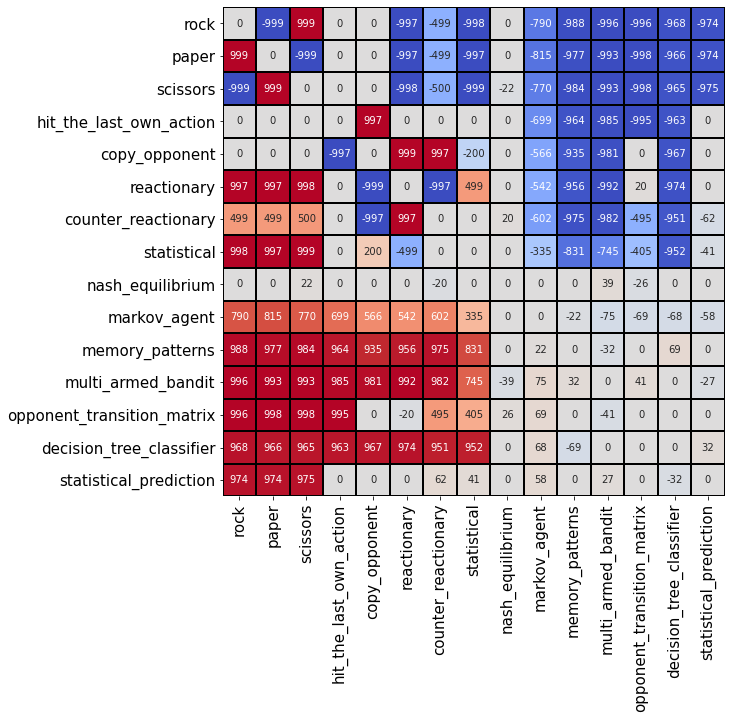

In [25]:
df_scores = pd.DataFrame(
    scores, 
    index=list_names, 
    columns=list_names,
)


plt.figure(figsize=(9, 9))
sns.heatmap(
    df_scores, annot=True, cbar=False, 
    cmap='coolwarm', linewidths=1, 
    linecolor='black', fmt="d",
)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15);

<a id="102"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Test Your Own Agent<center><h2>


Create your agent in the cell below, and save it to the **your_agent.py** file, and your agent will fight against all existing agents in this kernel

In [26]:
%%writefile your_agent.py

# Example of the simple agent
def your_agent(observation, configuration):
    return 0

Writing your_agent.py


Create the array for battle results

In [27]:
scores = np.zeros((len(list_names), 1), dtype=int)

Simulating battles. It can take some time

In [28]:
for ind_agent_1 in range(len(list_names)):

    current_score = evaluate(
        "rps", 
        ["your_agent.py", list_agents[ind_agent_1]], 
        configuration={"episodeSteps": 1000}
    )

    scores[ind_agent_1, 0] = current_score[0][0]

Visualize the result

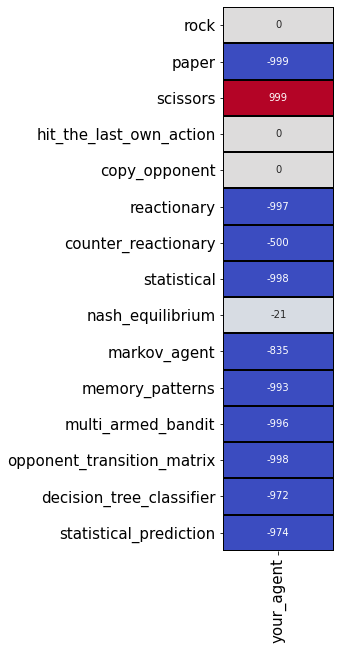

In [29]:
df_scores = pd.DataFrame(
    scores, 
    index=list_names, 
    columns=["your_agent"],
)


plt.figure(figsize=(2, 10))
sns.heatmap(
    df_scores, annot=True, cbar=False, 
    cmap="coolwarm", linewidths=1, linecolor="black", 
    fmt="d", vmin=-500, vmax=500,
)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=360, fontsize=15);